<a href="https://colab.research.google.com/github/KyzutoGH/capstone-unisba/blob/main/proyek_keberhasilan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 2. Load Dataset

In [ ]:
uploaded = files.upload() # Upload file data_baru.csv di setiap runtime
df = pd.read_csv('data_baru.csv')
df.head()

Saving data_baru.csv to data_baru.csv


,Unnamed: 0,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,0,23,84,No,7,73,Low,0,Medium,3,No,Male,67
1,1,19,64,No,8,59,Low,2,Medium,4,No,Female,61
2,2,24,98,Yes,7,91,Medium,2,Medium,4,No,Male,74
3,3,29,89,Yes,8,98,Medium,1,Medium,4,No,Male,71
4,4,19,92,Yes,6,65,Medium,3,High,4,No,Female,70


# 3. Data Preprosesing

## Menilai Dataset

In [ ]:
# missing value
df.isnull().sum()

,0
Unnamed: 0,0
Hours_Studied,0
Attendance,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Tutoring_Sessions,0
Teacher_Quality,78
Physical_Activity,0


In [ ]:
# informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  6607 non-null   int64 
 1   Hours_Studied               6607 non-null   int64 
 2   Attendance                  6607 non-null   int64 
 3   Extracurricular_Activities  6607 non-null   object
 4   Sleep_Hours                 6607 non-null   int64 
 5   Previous_Scores             6607 non-null   int64 
 6   Motivation_Level            6607 non-null   object
 7   Tutoring_Sessions           6607 non-null   int64 
 8   Teacher_Quality             6529 non-null   object
 9   Physical_Activity           6607 non-null   int64 
 10  Learning_Disabilities       6607 non-null   object
 11  Gender                      6607 non-null   object
 12  Exam_Score                  6607 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 671.2+ KB


In [ ]:
# deskripsi data
df.describe()

,Unnamed: 0,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,3303.000000,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,1907.420946,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,0.000000,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,1651.500000,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,3303.000000,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,4954.500000,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,6606.000000,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
# duplikasi
df.duplicated().sum()

np.int64(0)

## Cleaning Data

### menghapus kolom tidak penting

In [ ]:
drop_colum = ['Unnamed: 0', 'Learning_Disabilities','Extracurricular_Activities']
df.drop(drop_colum, axis=1, inplace=True)
print("kolum berhasil terhapus")

kolum berhasil terhapus


### Penanganan Missing value

In [ ]:
# Mengatasi missing value
df[df.Teacher_Quality.isna()]

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,Gender,Exam_Score
127,17,97,8,89,Medium,1,NaN,4,Male,69
396,10,80,6,93,High,4,NaN,3,Female,67
457,14,86,8,90,Medium,3,NaN,3,Male,65
570,20,71,8,77,Medium,0,NaN,4,Male,66
593,22,82,7,71,Low,1,NaN,3,Female,69
...,...,...,...,...,...,...,...,...,...,...
6414,22,63,7,94,Medium,0,NaN,3,Male,61
6427,29,75,7,96,Low,2,NaN,3,Male,68
6461,12,89,8,78,Low,4,NaN,5,Female,69
6579,9,84,6,74,Medium,5,NaN,2,Male,67


In [ ]:
print("\nData dengan Teacher_Quality yang kosong:")
df.Teacher_Quality.value_counts()


Data dengan Teacher_Quality yang kosong:


,count
Teacher_Quality,
Medium,3925
High,1947
Low,657


In [ ]:
# mengisi kolom nan dengan medium
df.fillna(value='Medium', inplace=True)

In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Tutoring_Sessions,0
Teacher_Quality,0
Physical_Activity,0
Gender,0
Exam_Score,0


### penanganan inacurate value

In [ ]:
df[df.Exam_Score == df.Exam_Score.max()]

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,Gender,Exam_Score
1525,27,98,6,93,Low,5,High,3,Female,101


In [ ]:
df['Exam_Score'] = df['Exam_Score'].replace(df.Exam_Score.max(), 100)

### Merubah type Data kategorical


In [ ]:
df['Motivation_Level'] = df['Motivation_Level'].astype('category')
df['Teacher_Quality'] = df['Teacher_Quality'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Hours_Studied      6607 non-null   int64   
 1   Attendance         6607 non-null   int64   
 2   Sleep_Hours        6607 non-null   int64   
 3   Previous_Scores    6607 non-null   int64   
 4   Motivation_Level   6607 non-null   category
 5   Tutoring_Sessions  6607 non-null   int64   
 6   Teacher_Quality    6607 non-null   category
 7   Physical_Activity  6607 non-null   int64   
 8   Gender             6607 non-null   category
 9   Exam_Score         6607 non-null   int64   
dtypes: category(3), int64(7)
memory usage: 381.2 KB


# 4. Data preparation

## Melakukan Encoding terhadap kolom kategorikal

In [ ]:
labelEncoder = LabelEncoder()
# mendefinisikan kolum
categoricalColumn = ['Motivation_Level','Teacher_Quality','Gender']
# melakukan encoding terhadap colum
for label in categoricalColumn:
  df[label] = labelEncoder.fit_transform(df[label])

## Menambahkan kolom success_value sebagai target

In [ ]:
# menetapkan bobot masing-masing kolom
feature_weight ={
    'Hours_Studied' : 3,
    'Attendance' : 1.5,
    'Sleep_Hours' :0.6,
    'Previous_Scores' : 1,
    'Motivation_Level' : 0.5,
    'Tutoring_Sessions' :0.8,
    'Teacher_Quality' :0.2,
    'Physical_Activity':0.4,
    'Exam_Score' : 2
}
# Hitung Skor gabungan berdasarkan bobot
df['raw_success_score']= sum(df[column] * weight for column, weight in feature_weight.items())

In [ ]:
# normalisasi skor
scaler=MinMaxScaler(feature_range=(1,100))
df['success_value']= scaler.fit_transform(df[['raw_success_score']])
# bulatkan nilai
df['success_value'] = df['success_value'].round().astype(int)
# hapus kolum raw_success_score
df.drop('raw_success_score', axis=1, inplace=True)

In [ ]:
# menambah kolum category
def category_sucess(value):
  if value <=40:
    return 'Gagal'
  elif value <=74:
    return 'Cukup'
  else:
    return 'Berhasil'

df['category_success']=df['success_value'].apply(category_sucess)

In [ ]:
# melakukan mapping terhadap category_success
label_mapping ={
    'Gagal' : 0,
    'Cukup' : 1,
    'Berhasil' : 2
}
df['category_success']=df['category_success'].map(label_mapping)

In [ ]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,Gender,Exam_Score,success_value,category_success
0,23,84,7,73,1,0,2,3,1,67,52,1
1,19,64,8,59,1,2,2,4,0,61,26,0
2,24,98,7,91,2,2,2,4,1,74,75,2
3,29,89,8,98,2,1,2,4,1,71,76,2
4,19,92,6,65,2,3,0,4,0,70,52,1


#5. Exploratory Data Analysis

### Melihat Dimensi dan Tipe Data

In [ ]:
df.shape

(6607, 12)

### Cek Statistik Umum

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,Gender,Exam_Score,success_value,category_success
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.307553,1.493719,1.311185,2.967610,0.577267,67.235508,47.050401,0.702437
std,5.990594,11.547475,1.46812,14.399784,0.782515,1.230570,0.896574,1.031231,0.494031,3.889161,13.821240,0.507138
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,0.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,1.000000,0.000000,2.000000,0.000000,65.000000,38.000000,0.000000
50%,20.000000,80.000000,7.00000,75.000000,2.000000,1.000000,2.000000,3.000000,1.000000,67.000000,47.000000,1.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,2.000000,2.000000,4.000000,1.000000,69.000000,56.000000,1.000000
max,44.000000,100.000000,10.00000,100.000000,2.000000,8.000000,2.000000,6.000000,1.000000,100.000000,100.000000,2.000000


### Cek Nilai Unik dan Tipe Kategorikal

In [ ]:
# Motivation Level
df['Motivation_Level'].value_counts()

,count
Motivation_Level,
2,3351
1,1937
0,1319


In [ ]:
# Gender
gender_count = df['Gender'].value_counts()
gender_count

,count
Gender,
1,3814
0,2793


In [ ]:
# Teacher Quality
df['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
2,4003
0,1947
1,657


### Cek Korelasi antar Fitur Numerik

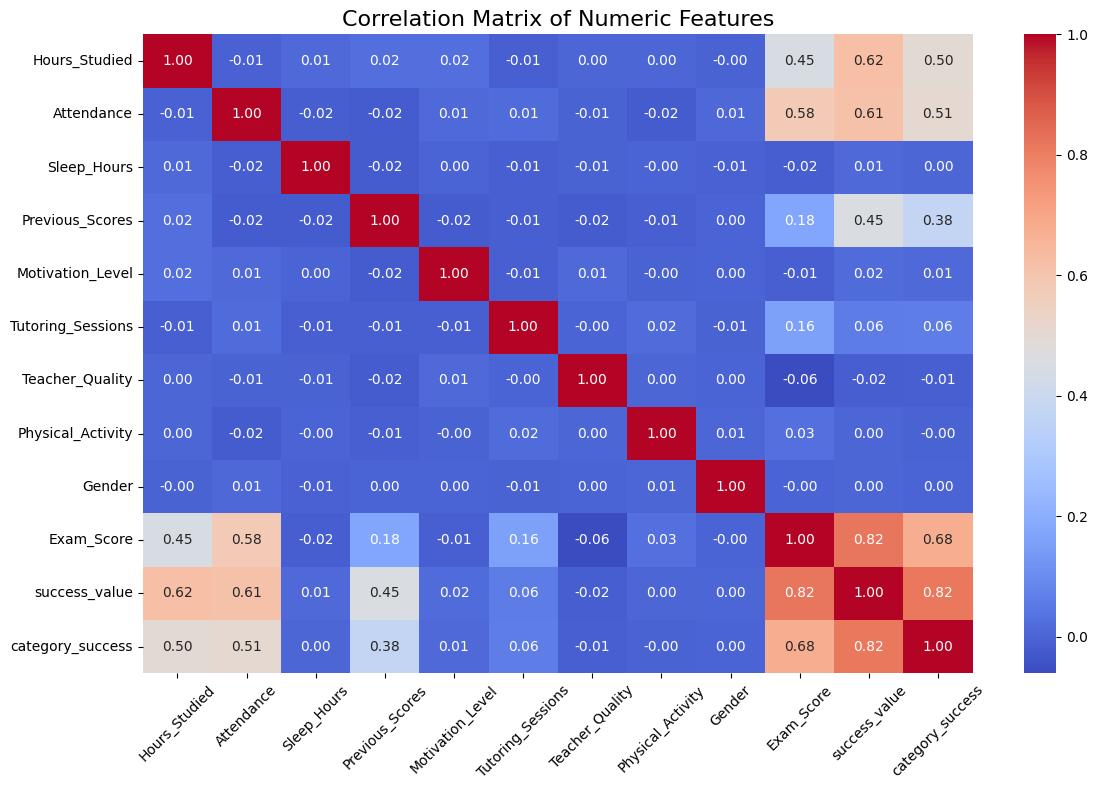

In [ ]:
# Menampilkan korelasi antara fitur numerik
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Identifikasi faktor paling berpengaruh terhadap Nilai Ujian

In [ ]:
print("\nFaktor paling berpengaruh terhadap success_value:")
correlations = correlation_matrix['success_value'].sort_values(ascending=False)
print(correlations)


Faktor paling berpengaruh terhadap success_value:
success_value        1.000000
Exam_Score           0.819366
category_success     0.817547
Hours_Studied        0.621443
Attendance           0.614172
Previous_Scores      0.453945
Tutoring_Sessions    0.057555
Motivation_Level     0.016594
Sleep_Hours          0.010402
Physical_Activity    0.004968
Gender               0.001392
Teacher_Quality     -0.017709
Name: success_value, dtype: float64


### Explanatary Data Analisis

#### Distribusi skor ujian

<Axes: xlabel='success_value', ylabel='Count'>

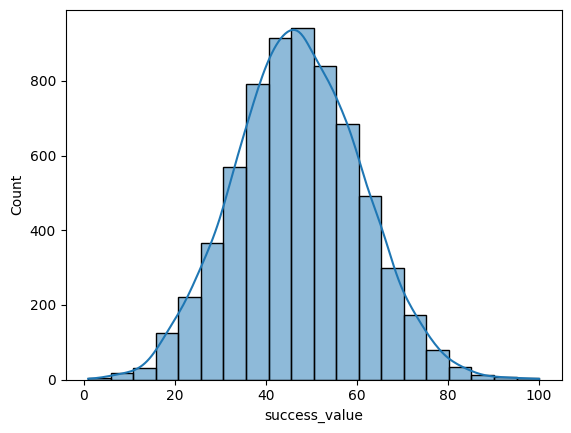

In [ ]:
sns.histplot(df['success_value'], bins=20, kde=True)

### Distribusi Hours_Studied

<Axes: xlabel='Hours_Studied', ylabel='Count'>

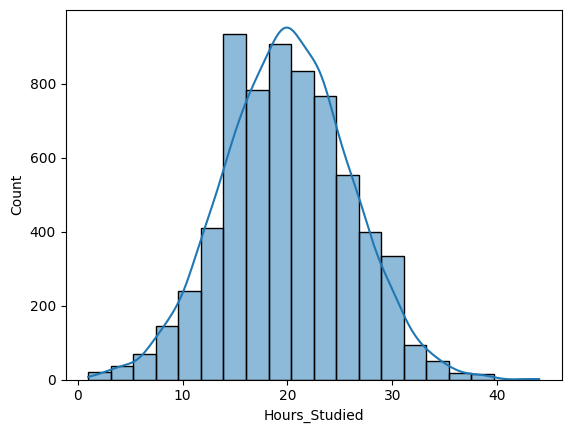

In [ ]:
sns.histplot(df['Hours_Studied'], bins=20, kde=True)

#### Distribusi Attedance

<Axes: xlabel='Attendance', ylabel='Count'>

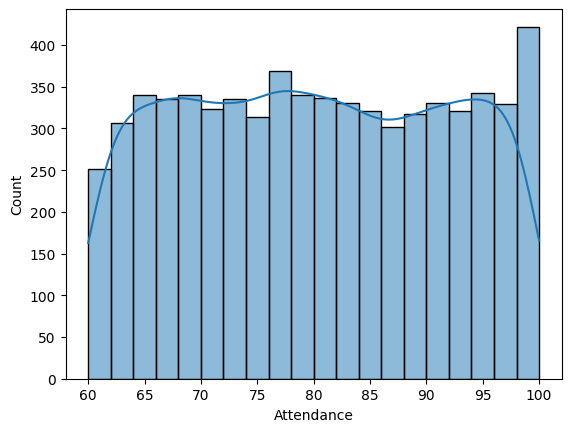

In [ ]:
sns.histplot(df['Attendance'], bins=20, kde=True)

#### Boxplot untuk deteksi outlier

<Axes: ylabel='success_value'>

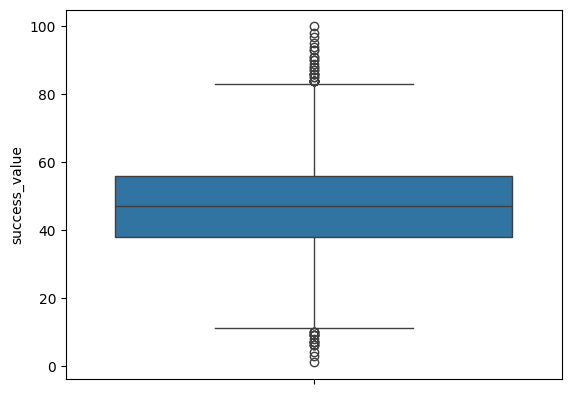

In [ ]:
sns.boxplot(data=df, y='success_value')

#### Perbandingan berdasarkan gender

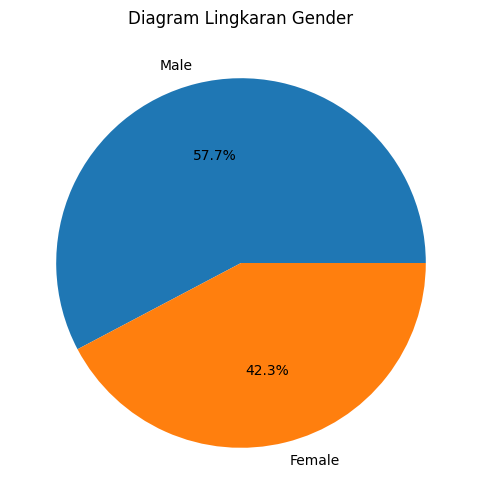

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran Gender')
plt.show()


##Hubungan antara Jam Belajar dengan Hasil Ujian

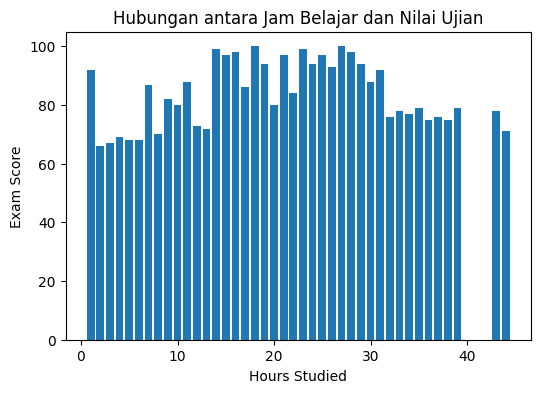

In [ ]:
plt.figure(figsize=(6,4))
# sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.bar(df['Hours_Studied'], df['Exam_Score'])
plt.title('Hubungan antara Jam Belajar dan Nilai Ujian')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

##Hubungan antara Kehadiran dengan Nilai Kesuksesan

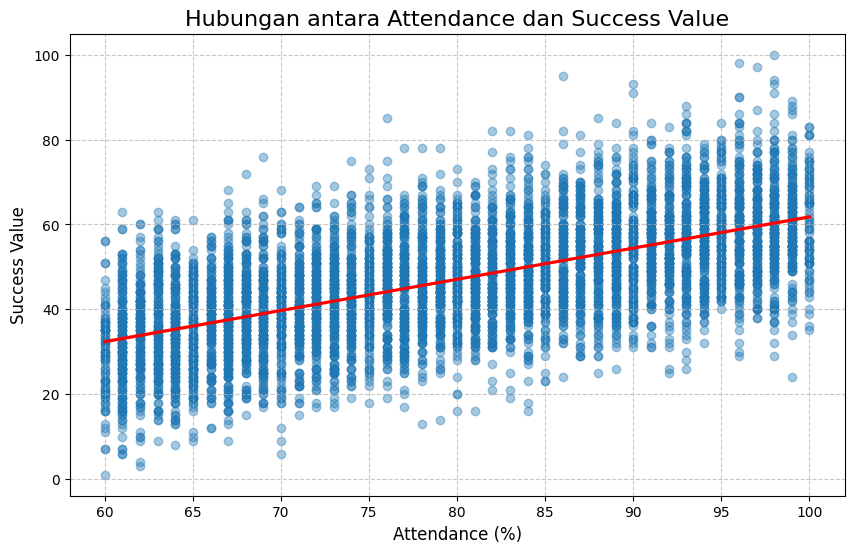

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Attendance', y='success_value', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Hubungan antara Attendance dan Success Value', fontsize=16)
plt.xlabel('Attendance (%)', fontsize=12)
plt.ylabel('Success Value', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

##Hubungan antara nilai sebelumnya dengan Hasil Ujian

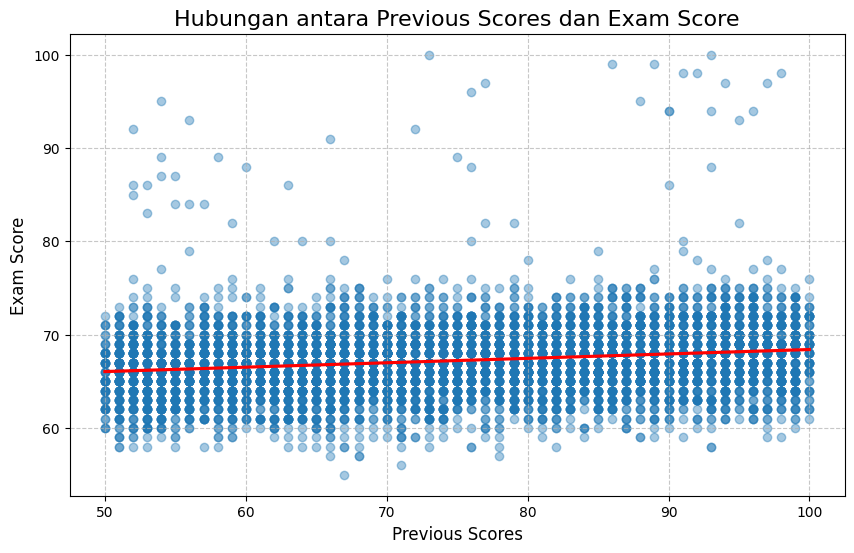

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Previous_Scores', y='Exam_Score', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Hubungan antara Previous Scores dan Exam Score', fontsize=16)
plt.xlabel('Previous Scores', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

##Perbandingan nilai ujian berdasarkan level motivasi

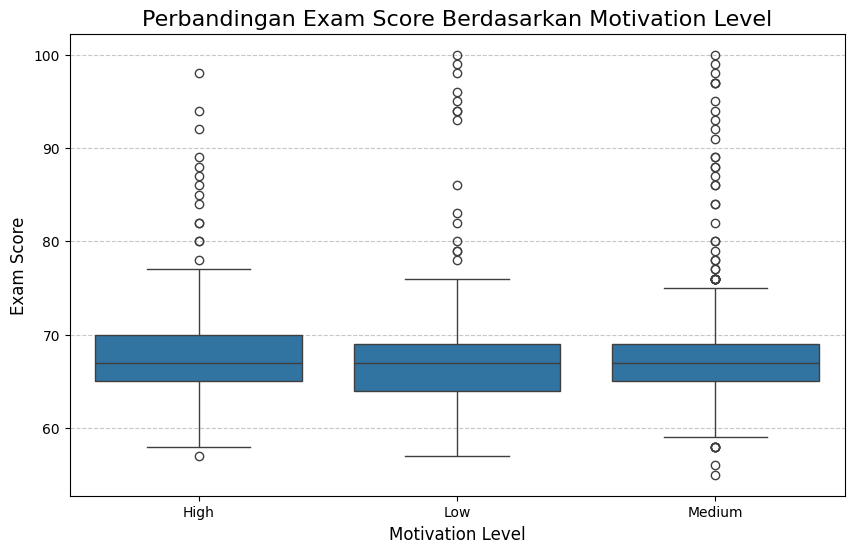

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.title('Perbandingan Exam Score Berdasarkan Motivation Level', fontsize=16)
plt.xlabel('Motivation Level', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Perbandingan nilai kesuksesan berdasarkan kualitas pengajar

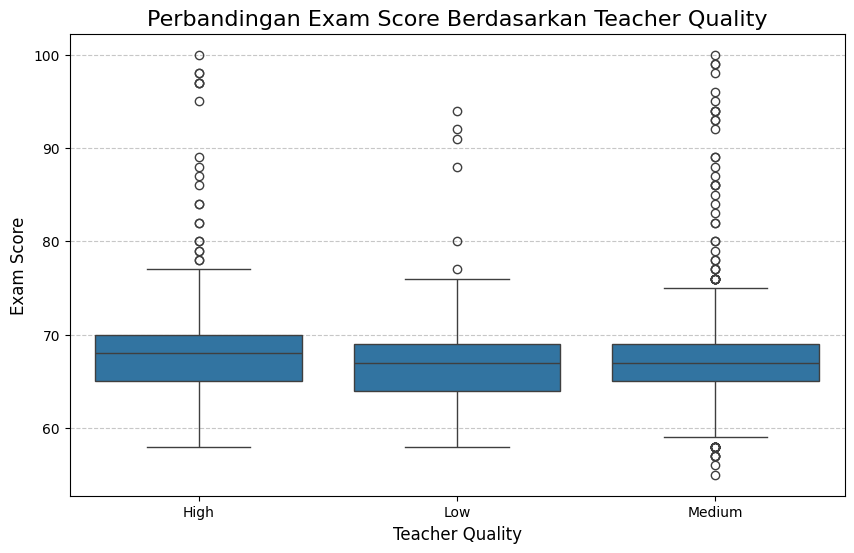

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Teacher_Quality', y='success_value', data=df)
plt.title('Perbandingan Exam Score Berdasarkan Teacher Quality', fontsize=16)
plt.xlabel('Teacher Quality', fontsize=12)
plt.ylabel('Success Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6 Splitting Dataset Menjadi Train, Test, Evaluasi

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['category_success'])
y = df['category_success']
# split pertama untuk training
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)
# split kedua untuk test dan validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

len(X_train), len(X_val), len(X_test)

(4624, 991, 992)

# 7 Melatih Model dengan Random Forest Clasifikasi

In [ ]:
# inisiasi model
RF=RandomForestClassifier(random_state=42)
# latih model
RF.fit(X_train, y_train)
# prediksi pada data validasi
y_pred = RF.predict(X_val)

# akurasi performa validasi
print("Akurasi model", accuracy_score(y_val, y_pred))
print("Laporan Klasifikasi")
print( classification_report(y_val, y_pred))

Akurasi model 1.0
Laporan Klasifikasi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       648
           2       1.00      1.00      1.00        24

    accuracy                           1.00       991
   macro avg       1.00      1.00      1.00       991
weighted avg       1.00      1.00      1.00       991



 ## menambahkan Hyperparameter tunning

In [ ]:
# Contoh mengurangi overfitting
RF_tuned = RandomForestClassifier(
    n_estimators=12,       # Jumlah pohon
    max_depth=5,           # kedalaman pohon
    min_samples_split=10,   # Minimum sampel untuk split
    min_samples_leaf=5,     # Minimum sampel pada daun
    max_features='sqrt',    # Jumlah fitur yang dipertimbangkan (dulu 'auto')
    random_state=42
)

# Latih model yang sudah di-tune
RF_tuned.fit(X_train, y_train)

# Evaluasi pada data validasi
y_pred_tuned = RF_tuned.predict(X_val)
print("Akurasi model Random Forest yang di-tune:", accuracy_score(y_val, y_pred_tuned))
print("Laporan Klasifikasi Random Forest yang di-tune:")
print(classification_report(y_val, y_pred_tuned))

Akurasi model Random Forest yang di-tune: 0.9969727547931383
Laporan Klasifikasi Random Forest yang di-tune:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       648
           2       1.00      0.88      0.93        24

    accuracy                           1.00       991
   macro avg       1.00      0.96      0.98       991
weighted avg       1.00      1.00      1.00       991



# 8. Menguji model

In [ ]:
# menguji model random forest
print("Evaluasi Model Random forest pada data uji")
y_pred_test = RF_tuned.predict(X_test)
# akurasi performa pada testing
print("Akurasi model", accuracy_score(y_test, y_pred_test))
print("Laporan Klasifikasi")
print(classification_report(y_test, y_pred_test))

Evaluasi Model Random forest pada data uji
Akurasi model 0.998991935483871
Laporan Klasifikasi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       649
           2       1.00      0.96      0.98        24

    accuracy                           1.00       992
   macro avg       1.00      0.99      0.99       992
weighted avg       1.00      1.00      1.00       992



# 9. Deserilization (Model Loading)

### Latih model mengunakan keras model
- tfjs hanya dapat bekerja di tensorflow library
- keras model dibangun diatas tensorflow library
- tfjs tidak dapat mengkonversi Random forest model dari Scikit-learn

In [ ]:
# definisikan model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
# Buatkan early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Latih keras model
history = model.fit(X_train, y_train,
                    epochs= 50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1
                    )
# Evaluasi model testing
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Tes Accuracy: {accuracy: .4f}")
print(f"Tes Loss: {loss: .4f}")

Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5883 - loss: 3.0590 - val_accuracy: 0.8991 - val_loss: 0.2767
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8284 - loss: 0.4510 - val_accuracy: 0.9273 - val_loss: 0.1938
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8649 - loss: 0.3354 - val_accuracy: 0.9465 - val_loss: 0.1794
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8979 - loss: 0.2498 - val_accuracy: 0.9405 - val_loss: 0.1692
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9051 - loss: 0.2331 - val_accuracy: 0.9495 - val_loss: 0.1463
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9151 - loss: 0.2060 - val_accuracy: 0.9354 - val_loss: 0.1500
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9212 - loss: 0.2041 - val_accuracy: 0.9516 - val_loss: 0.1382
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9239 - loss: 0.1940 - val_accuracy: 0.

### konversi ke tfjs model

In [ ]:
os.mkdir('tfjs_model')

In [ ]:
# directory tfjs disimpan
tfjs_model_dir = 'tfjs_model'
# convert dan simpan model menjadi format Tensoflow.js
tfjs.converters.save_keras_model(model, tfjs_model_dir)

print(f"TensorFlow.js model saved to: {tfjs_model_dir}")

failed to lookup keras version from the file,
    this is likely a weight only file
TensorFlow.js model saved to: tfjs_model/my_model.keras


In [ ]:
# Specify the file path for the native Keras format
keras_model_path = 'my_model.keras'

# Save the model in the native Keras format
model.save(keras_model_path)

print(f"Model saved successfully in native Keras format to: {keras_model_path}")

Model saved successfully in native Keras format to: my_keras_model.keras
